/home/zx/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: covariance is not positive-semidefinite.


Epoch 0: last batch loss = 0.9841
Epoch 1: last batch loss = 0.2827
Epoch 2: last batch loss = 0.1838
Epoch 3: last batch loss = 0.1516
Epoch 4: last batch loss = 0.1431
Epoch 5: last batch loss = 0.1464
Epoch 6: last batch loss = 0.1330
Epoch 7: last batch loss = 0.1305
Epoch 8: last batch loss = 0.1339
Epoch 9: last batch loss = 0.1169
Time per epoch: 0.065 s


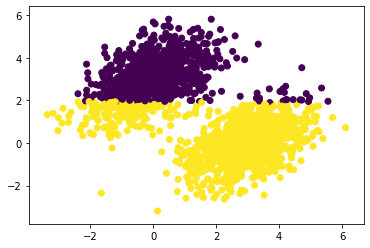

In [2]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import time


x_dim=2
y_dim=1
learn_rate=0.01

W=tf.Variable(tf.random.normal(shape=(x_dim, y_dim)))
b=tf.Variable(tf.random.normal(shape=(y_dim,)))

def compute_prediction(x):
    return tf.matmul(x, W) + b

def compute_loss(labels, predictions):
    return tf.reduce_mean(tf.square(labels - predictions))

@tf.function
def train_on_batch(x, y):
    with tf.GradientTape() as tape:
        predictions = compute_prediction(x)
        loss = compute_loss(y, predictions)
        dloss_w, dloss_b = tape.gradient(loss, [W, b])
    W.assign_sub(dloss_w * learn_rate)
    b.assign_sub(dloss_b * learn_rate)
    return loss

samples_num= 1000
negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1,0.5],[0.5,1]],size=samples_num)
positive_samples=np.random.multivariate_normal(mean=[3,0], cov=[[0.5,1],[1, 0.5]], size=samples_num)

x = np.vstack((negative_samples, positive_samples)).astype(np.float32)
y = np.vstack((np.zeros((samples_num, 1),dtype=np.float32),  np.ones((samples_num, 1), dtype=np.float32)))

plt.scatter(x[:, 0], x[:, 1], y[:, 0])

indices = np.random.permutation(len(x))
x = x[indices]
y = y[indices]
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

t0 = time.time()
for epoch in range(10):
    for _step, (x_, y_) in enumerate(dataset):
       loss =  train_on_batch(x_, y_)
    print("Epoch %d: last batch loss = %.4f" %(epoch, float(loss)))
t = time.time() - t0
print("Time per epoch: %.3f s" %(t/10,))

predictions = compute_prediction(x)
plt.scatter(x[:,0],x[:,1],c=predictions[:,0]>0.5)